In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('reg_data.csv')
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500.0,33.0,Chicago,80.0,BMW,Bachelor
1,Female,1200.0,33.0,Chicago,82.5,Ford,No
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor
3,Male,2100.0,42.0,New York,90.0,BMW,Master
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master
5,Female,1700.0,42.0,Washington,60.0,Ford,Master
6,Male,3000.0,50.0,Washington,77.0,Ford,No
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor
9,Male,2900.0,46.0,New York,70.0,GM,Master


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model

In [4]:
df.corr()

,Salary,Age,Weight
Salary,1.000000,0.580216,-0.207958
Age,0.580216,1.000000,-0.321182
Weight,-0.207958,-0.321182,1.000000


In [5]:
df.columns

Index(['Gender', 'Salary', 'Age', 'Place', 'Weight', 'Company',
       'Academic_degree'],
      dtype='object')

In [6]:
df.dropna(inplace = True)
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500.0,33.0,Chicago,80.0,BMW,Bachelor
1,Female,1200.0,33.0,Chicago,82.5,Ford,No
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor
3,Male,2100.0,42.0,New York,90.0,BMW,Master
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master
5,Female,1700.0,42.0,Washington,60.0,Ford,Master
6,Male,3000.0,50.0,Washington,77.0,Ford,No
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor
9,Male,2900.0,46.0,New York,70.0,GM,Master


In [7]:
df.corr()

,Salary,Age,Weight
Salary,1.000000,0.616834,-0.080883
Age,0.616834,1.000000,-0.212340
Weight,-0.080883,-0.212340,1.000000


# 1. Is there any relation between Age and Salary. (Salary depends on Age?)

Salary = b0 + b1*Age

b0 -> y intercept (value of y when b0 = 0)

b1 -> slope / pendiente

In [8]:
y = pd.DataFrame(df['Salary'])
x = pd.DataFrame(df['Age'])

lm = linear_model.LinearRegression()
model_lm = lm.fit(x,y)
model_lm

LinearRegression()

In [9]:
print('The y intercept, b0 = ', model_lm.intercept_)
print('The coefficient of Age, b1 = ', model_lm.coef_)
print('The R^2 value is = ', model_lm.score(x,y))

The y intercept, b0 =  [349.44580104]
The coefficient of Age, b1 =  [[48.09321584]]
The R^2 value is =  0.380484541757693


In [23]:
modelA = sm.OLS.from_formula('Salary~Age', data = df)
resultA = modelA.fit()
resultA.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     6.142
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0326
Time:                        14:15:17   Log-Likelihood:                -91.514
No. Observations:                  12   AIC:                             187.0
Df Residuals:                      10   BIC:                             188.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    349.4458    790.373      0.442      0.668   -1411.614    2110.506
Age           48.0932     19.406      2.478      0.033       4.853      91.333
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.479
Skew:                           0.321   Prob(JB):                        0.787
Kurtosis:                       2.261   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## salary = b0 + b1*age

#### Salary of a person with age = 33

Salary = 349.44 + 48.09*40

In [24]:
salary = 349.4458 + 48.0932*33
salary
print('The predicted salary of a 33 year old person is $', salary)

The predicted salary of a 33 year old person is $ 1936.5214


In [25]:
res0 = 1500 - 1936.5214
res1 = 1200 - 1936.5214
print('residual values of the first 2 data are: ', res0, '\t', res1)

residual values of the first 2 data are:  -436.5214000000001 	 -736.5214000000001


In [26]:
RESI_A = resultA.resid
RESI_A

0    -436.521924
1    -736.521924
2     215.384860
3    -269.360866
4    -244.149060
5    -669.360866
6     245.893407
7       5.427328
8     959.664508
9     338.266270
10    699.198429
11   -107.920161
dtype: float64

Text(0.5, 1.0, 'Regression plot of Age vs Salary')

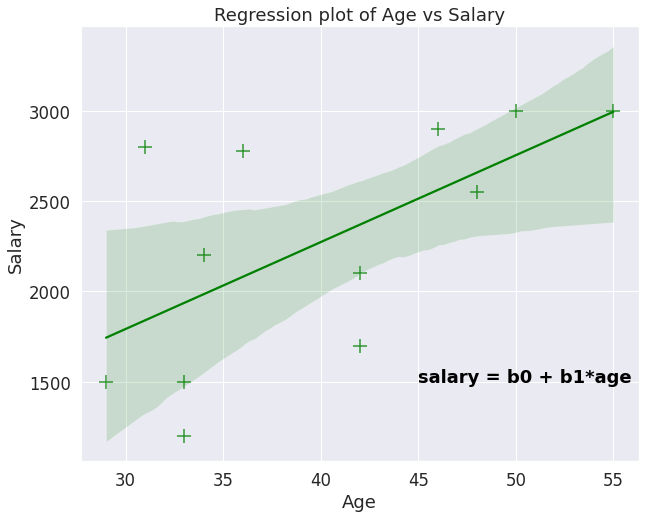

In [52]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.5)
ax = sns.regplot(x = 'Age',
                 y = 'Salary',
                 data = df,
                color = 'green',
                marker = '+',
                scatter_kws = {'s': 200}
                )
ax.set(xlabel = 'Age',
      ylabel = 'Salary')
ax.text(45,1500, 'salary = b0 + b1*age',
       horizontalalignment = 'left', size = 'medium', color = 'black', weight = 'semibold')
ax.set_title('Regression plot of Age vs Salary')

In [42]:
predicted_values = resultA.fittedvalues.to_frame()
predicted_values

,0
0,1936.521924
1,1936.521924
2,1984.615140
3,2369.360866
4,1744.149060
5,2369.360866
6,2754.106593
7,2994.572672
8,1840.335492
9,2561.733730


Text(0.5, 1.0, 'Residual plot of Age vs Salary')

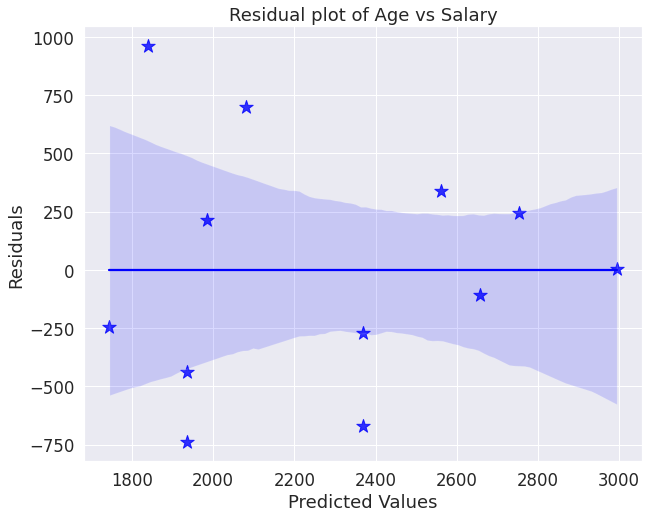

In [51]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.5)
ax = sns.regplot(x = predicted_values,
                 y = RESI_A,
                 data = df,
                color = 'blue',
                marker = '*',
                scatter_kws = {'s': 200}
                )
ax.set(xlabel = 'Predicted Values',
      ylabel = 'Residuals')
ax.set_title('Residual plot of Age vs Salary')

In [56]:
modelB = sm.OLS.from_formula('Salary~Age+Gender', data = df)
resultB = modelB.fit()
resultB.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     3.101
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0945
Time:                        14:37:33   Log-Likelihood:                -91.242
No. Observations:                  12   AIC:                             188.5
Df Residuals:                       9   BIC:                             189.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        749.8157   1023.148      0.733      0.482   -1564.706    3064.337
Gender[T.Male]   306.7169    474.438      0.646      0.534    -766.535    1379.969
Age               34.2211     29.331      1.167      0.273     -32.130     100.573
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.061
Skew:                           0.691   Prob(JB):                        0.588
Kurtosis:                       2.541   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### salary = b0 + b1* Age + b2* Gender

salary = b0 + b1* Age + b2* (G_male + G_female)

salary = 749.8157 + 34.2211*Age + 306.7169*Gender[T.Male]

### What is the salary of a 42 year old male and female?

In [59]:
print('The salary of a 42 year old male is', 749.8157 + 34.2211*42 + 306.7169*1)
print('The salary of a 42 year old female is', 749.8157 + 34.2211*42 + 306.7169*0)

The salary of a 42 year old male is 2493.8188
The salary of a 42 year old female is 2187.1019


In [60]:
modelC = sm.OLS.from_formula('Salary~Age+Academic_degree', data = df)
resultC = modelC.fit()
resultC.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     2.205
Date:                Fri, 11 Mar 2022   Prob (F-statistic):              0.165
Time:                        14:50:30   Log-Likelihood:                -90.772
No. Observations:                  12   AIC:                             189.5
Df Residuals:                       8   BIC:                             191.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   399.7629    841.446      0.475      0.647   -1540.616    2340.142
Academic_degree[T.Master]  -387.6666    388.817     -0.997      0.348   -1284.279     508.946
Academic_degree[T.No]      -121.4903    437.406     -0.278      0.788   -1130.151     887.170
Age                          51.6402     20.692      2.496      0.037       3.925      99.355
==============================================================================
Omnibus:                        0.199   Durbin-Watson:                   1.152
Prob(Omnibus):                  0.905   Jarque-Bera (JB):                0.386
Skew:                           0.073   Prob(JB):                        0.824
Kurtosis:                       2.133   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### salary = b0 + b1* Age + b2* Gender

salary = b0 + b1* Age + b2* (G_male + G_female)

salary = 399.7629 + 51.6402*Age - 387.6666*Academic_degree[T.Master] - 121.4903*Academic_degree[T.No]

In [62]:
print('The salary of a 42 year old person with a master is', 399.7629 + 51.6402*42 - 387.6666*1 - 121.4903*0)

The salary of a 42 year old person with a master is 2180.9847
